In [27]:
import pandas as pd
import numpy as np


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
pwd


'C:\\Users\\hp\\my project'

In [30]:
print("numpy",np.__version__)
print("pandas",pd.__version__)


numpy 1.26.4
pandas 2.2.2


In [31]:
data = pd.read_csv("heart.csv")

In [32]:
from random import randrange,uniform
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
import sklearn

In [34]:
print("sklearn",sklearn.__version__)

sklearn 1.4.2


In [35]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [36]:

data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
206,59,1,0,110,239,0,0,142,1,1.2,1,1,3,0
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2,1
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2,1
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1


In [37]:

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [39]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


target:
0 = no disease,
1 = disease

In [41]:
data.shape

(303, 14)

data #93, 159, 164, 165 and 252 have ca=4 which is incorrect. In the original Cleveland dataset they are NaNs.
data #49 and 282 have thal = 0, also incorrect. They are also NaNs in the original dataset
.**
Action: Drop the faulty data! (7 data entry will be dropped)

data = data[data['ca'] < 4] #drop the wrong ca values
data = data[data['thal'] > 0] # drop the wong thal value
print(f'The length of the data now is {len(data)} instead of 303!')

In [44]:
data.shape

(303, 14)

Let's make the name of the column more understanable

#df.rename(columns={'old_column_name1': 'new_column_name1', 'old_column_name2': 'new_column_name2'}, inplace=True)

In [47]:
data=data.rename(columns={'cp':'chest_pain_type','trestbps':'resting_blood_pressure','chol':'cholesterol',
'fbs':'fasting_blood_sugar','restecg':'resting_electrocardiogram','thalach':'max_heart_rate_achieved','exang': 'exercise_induced_angina',
'oldpeak': 'st_depression','slope': 'st_slope' ,'ca':'num_major_vessels','thal': 'thalassemia'})

In [48]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Making data more easy to understand and which helps in visualize the data easily

In [50]:
#data['sex'] = data['sex'].astype('object')

In [51]:
#data['chest_pain_type'] = data['chest_pain_type'].astype('object')

In [52]:
#data['fasting_blood_sugar'] = data['fasting_blood_sugar'].astype('object')

In [53]:
#data['resting_electrocardiogram'] = data['resting_electrocardiogram'].astype('object')

In [54]:
#data.loc[data['sex']==0, 'sex']= 'female'
#data.loc[data['sex']==1, 'sex']= 'male'

In [55]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
#data.loc[data['chest_pain_type']==0, 'chest_pain_type'] = 'typical angina'
#data.loc[data['chest_pain_type']==1, 'chest_pain_type'] = 'atypical angina'
#data.loc[data['chest_pain_type']==2, 'chest_pain_type'] = 'non-anginal pain'
#data.loc[data['chest_pain_type']==3, 'chest_pain_type'] = 'asymptomatic'

In [57]:
#data.loc[data['fasting_blood_sugar']==0, 'fasting_blood_sugar'] = 'lower than 120mg/ml'
#data.loc[data['fasting_blood_sugar']==1, 'fasting_blood_sugar'] = 'greater than 120mg/ml'

In [58]:
#data.loc[data['resting_electrocardiogram']==0, 'resting_electrocardiogram'] = 'normal'
#data.loc[data['resting_electrocardiogram']==1, 'resting_electrocardiogram'] = 'ST-T wave abnormality'
#data.loc[data['resting_electrocardiogram']==2, 'resting_electrocardiogram'] = 'left ventricular hypertrophy'

In [59]:
data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Statistical summary of the numerical features

Age :The average age in the dataset is 54.5 years
The oldest is 77 years.

Cholesterol: The average registered cholestrol level is 247.15
Maximum level is 564 and the minimum level is 126.
// usually high level of cholesterol is associated with heart disease.
    
Resting blood pressure: 131 mean, 200 max and 94 min
Max heart rate achieved:
The average max heart rate registered is 149.5 bpm. The Maximum and the minumum are 202 and 71 bpm respectively.
St_depression:
The average value of st_dpression is 1.06. Max is 6.2 and the minimum is 0.
Number of major blood vessels:
A maximum of 3 and a minimum of 0 major blood vessels are observed. The mean value is 0.68.

Exploratory Data Analysis (EDA)

In [62]:
import seaborn as sns
%matplotlib inline

In [63]:

y = data["target"]

sns.countplot(y)


target_temp = data.target.value_counts()

print(target_temp)

target
1    165
0    138
Name: count, dtype: int64


In [64]:
sns.countplot(x='target', data=data)


<Axes: xlabel='target', ylabel='count'>

sns.countplot(x='target',data=data,palette='Set2')

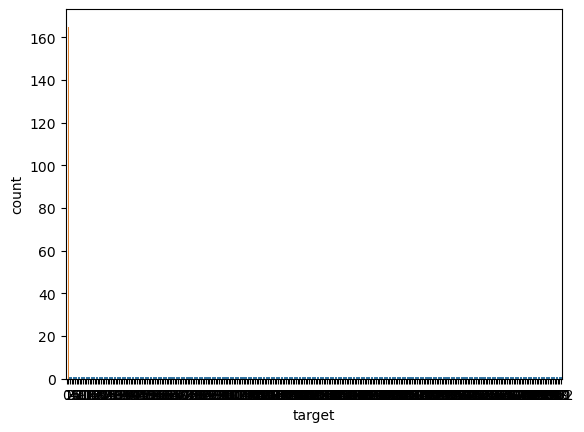

In [66]:
plt.show()

In [67]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))
     

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [68]:
sns.barplot(x='sex', y='target', data=data, hue='sex', palette='RdBu_r', legend=False)


<Axes: xlabel='sex', ylabel='target'>

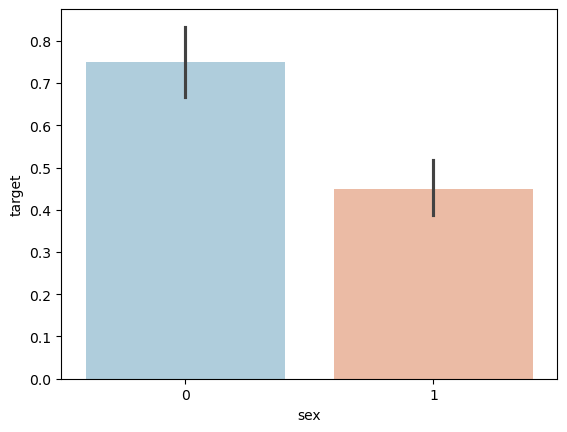

In [69]:
plt.show()
plt.savefig('heartDiseaseAndSex.png')

We have seen that women are more likely to suffer from heart disease

In [71]:
#data1 = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'target']
#data1 = data[_]
#g = sns.pairplot(data1, hue="target", corner=True, diag_kind='hist');
#plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 20);

In [72]:
selected_columns = ['age', 'cholesterol', 'resting_blood_pressure', 'target']

In [73]:
sns.pairplot(data[selected_columns],hue='target',height=1.4,aspect=1.5)

<Figure size 640x480 with 0 Axes>

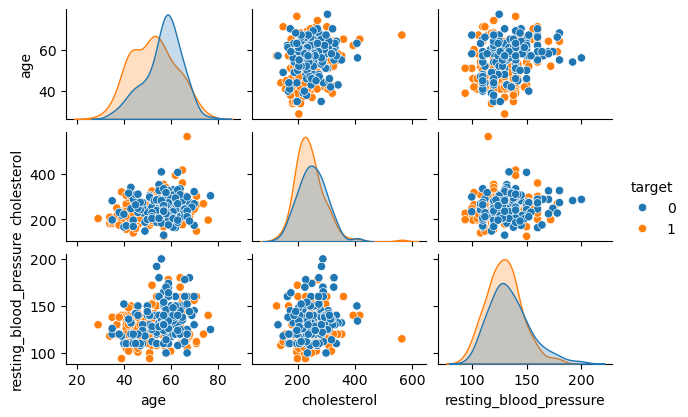

In [74]:
plt.show()

Feature Selection

In [76]:
names=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']
     

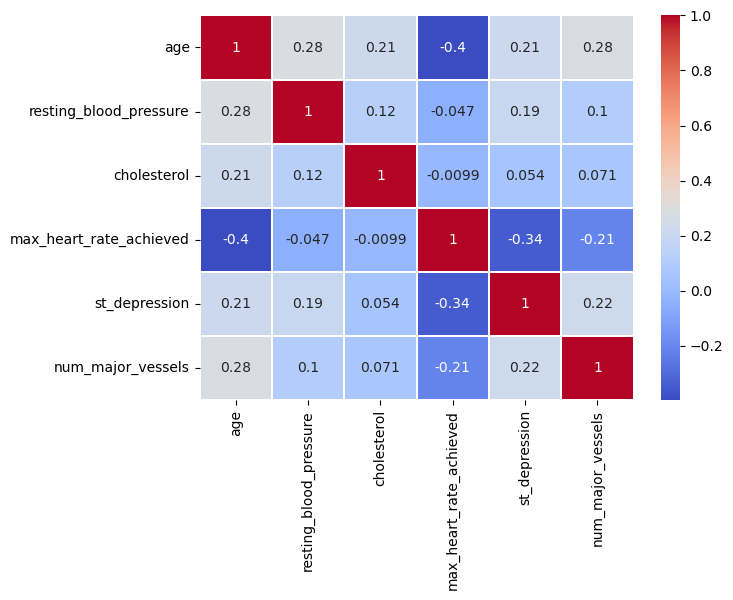

In [77]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = data.loc[:,names]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

In [78]:
dt=data.corr()

In [79]:
dt

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain_type,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
resting_blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
resting_electrocardiogram,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
max_heart_rate_achieved,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exercise_induced_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
st_depression,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [80]:
sns.lmplot(x='age',y='cholesterol',data=data,hue='target')

In [81]:
plt.figure(figsize=(3,2))

<Figure size 300x200 with 0 Axes>

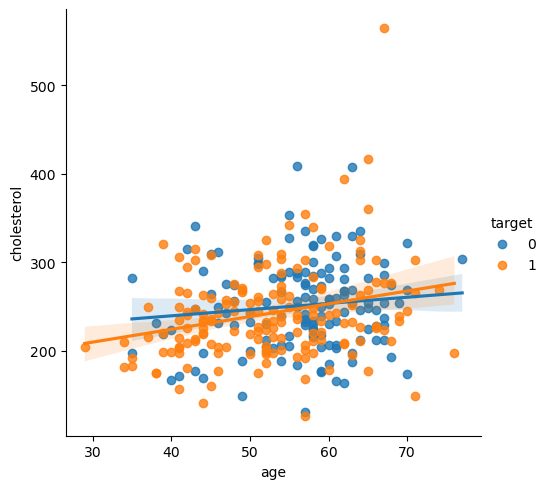

<Figure size 300x200 with 0 Axes>

In [82]:
plt.show()

In [83]:
sns.lmplot(x='age',y='max_heart_rate_achieved',data=data,hue='target')

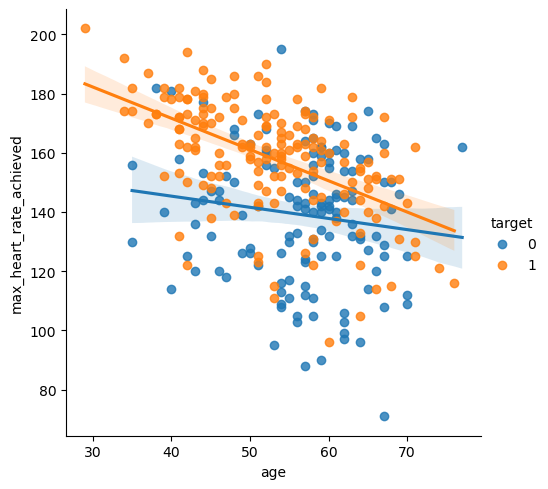

In [84]:
plt.show()

In [85]:
sns.lmplot(x='age',y='resting_blood_pressure',data=data,hue='target')

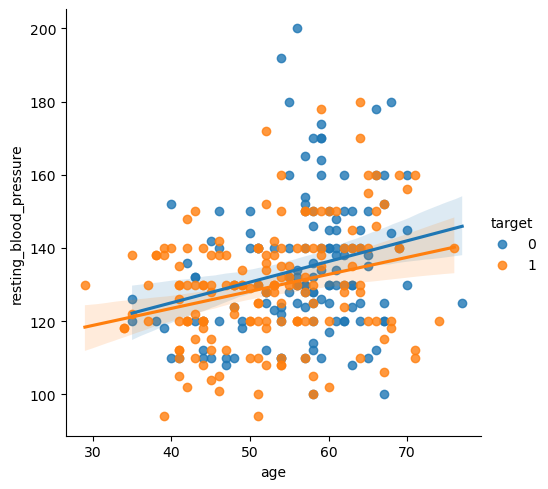

In [86]:
plt.show()

 Thalassemia vs Cholesterol

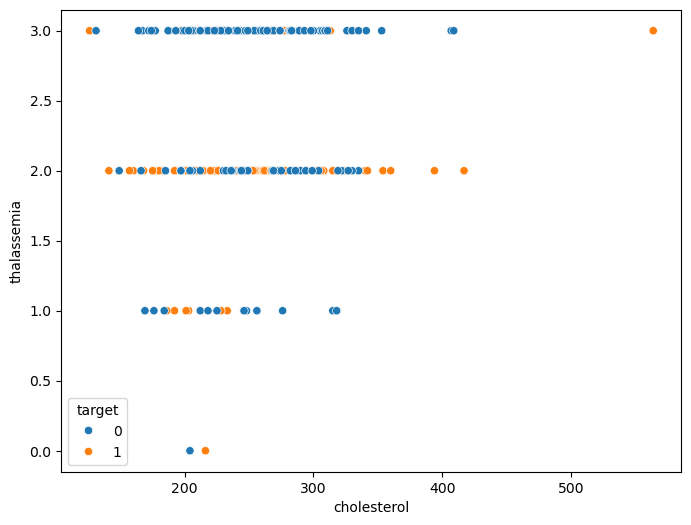

In [88]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='cholesterol',y='thalassemia',data=data,hue='target')
plt.show()

In [89]:
#print(data.columns)

Thalassemia vs resting blood pressure

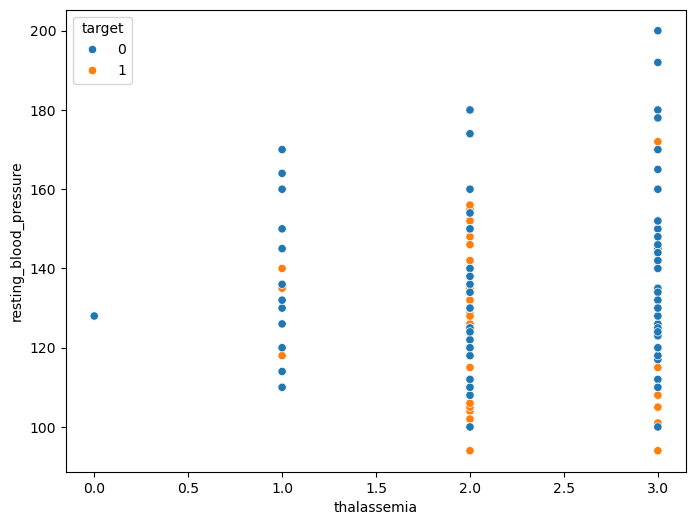

In [91]:

plt.figure(figsize=(8,6))
sns.scatterplot(x='thalassemia',y='resting_blood_pressure',data=data,hue='target')
plt.show()

In [92]:
data.isnull().sum()

age                          0
sex                          0
chest_pain_type              0
resting_blood_pressure       0
cholesterol                  0
fasting_blood_sugar          0
resting_electrocardiogram    0
max_heart_rate_achieved      0
exercise_induced_angina      0
st_depression                0
st_slope                     0
num_major_vessels            0
thalassemia                  0
target                       0
dtype: int64

Train Test Split

in the train test split i have split the dataset in three categories, training,testing and validation dataset.in the first split there i have taken x train,x temp, y train and y temp.
here the test size is 40 persin means the 40 percent and 60 percent. the 60 percent of the dataset is for training. and the remaining 40 percetn stored
in x temp and y temp. in the second split the 40 percent dataset is again split into 0.5 test size means 50 percent

In [95]:
from sklearn.model_selection import train_test_split
X = data.drop('target', axis=1) 
y = data['target']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=24)

In [96]:
#Second split
# Then, split the remaining data into validation (e.g., 20%) and testing (e.g., 20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now we have 60% training, 20% validation, and 20% testing


In [97]:

X_train.shape

(181, 13)

In [98]:
X_test.shape

(61, 13)

In [99]:
X_val.shape

(61, 13)

In [100]:
y_train.shape

(181,)

Model fitting--

In [102]:


from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],   # Regularization parameter
    'max_iter': [100, 200, 500],     # Max iterations for solver convergence
    'solver': ['lbfgs', 'liblinear', 'saga'], # Different solvers to try
    'penalty': ['l2'],               # L2 regularization (default for lbfgs)
    'class_weight': ['balanced', None] # Handle class imbalance
}

# Step 3: Set up GridSearchCV for hyperparameter tuning
logmodel = LogisticRegression()
grid_search = GridSearchCV(logmodel, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model after tuning
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 4: Cross-validation with the best model
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Step 5: Train and evaluate the best model on the test set
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)










Best Parameters: {'C': 1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.8342342342342342
Cross-Validation Scores: [0.83783784 0.75       0.86111111 0.91666667 0.80555556]
Mean CV Accuracy: 0.8342342342342342


In [103]:


accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))








Test Set Accuracy: 0.8360655737704918

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.82      0.91      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61


Confusion Matrix:
[[20  7]
 [ 3 31]]


In [104]:
#from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logmodel = LogisticRegression(solver='lbfgs', max_iter=400)
logmodel.fit(X_train_scaled, y_train)

In [118]:
#predictions = logmodel.predict(X_val)

Evaluation

In [121]:
#from sklearn.metrics import classification_report

In [123]:
#print(classification_report(y_val,predictions))

NameError: name 'predictions' is not defined

In [125]:

#score = round(accuracy_score(predictions,y_val)*100,2)

#print("The accuracy score achieved using Logistic Regression is: "+str(score)+" %")

In [127]:
## Decision tree

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [131]:
dtree = DecisionTreeClassifier()

In [133]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [135]:
predictions = dtree.predict(X_val)

In [137]:
from sklearn.metrics import classification_report,confusion_matrix

In [139]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75        27
           1       0.80      0.82      0.81        34

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [141]:
## Random Forest Classifier

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train with a new model or improved parameters
model = RandomForestClassifier(n_estimators=200, max_depth=20, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

# Evaluate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Improved Accuracy: {accuracy:.2f}")


Improved Accuracy: 0.79


In [147]:
import numpy as np

from sklearn.model_selection import RandomizedSearchCV

#Number of trees in random forest

n_estimators= [int(x) for x in np.linspace(start= 200, stop =2000, num =10)] 

max_features =['auto', 'sqrt', 'log2']

#Maximum number of Levels in tree

max_depth= [int(x) for x in np.linspace(10, 1000,10)] #Minimum number of samples required to split a node

min_samples_split= [1,3,4,5,9]

#Minimum number of samples required at each Leaf node

min_samples_leaf= [1,2,4,6,8]

#Create the random grid

random_grid ={'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
            'criterion': ['entropy', 'gini']}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 3, 4, 5, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [157]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=100,
                               n_jobs=-1)
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
147 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 3, 4, 5, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [174]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 120,
 'criterion': 'gini'}

In [178]:
rf_randomcv.best_estimator_

RandomForestClassifier(max_depth=120, max_features='log2', min_samples_leaf=2,
                       min_samples_split=3, n_estimators=200)

In [180]:
RandomForestClassifier(criterion='gini',max_depth=560,max_features='sqrt', min_samples_leaf=2, min_samples_split=3,
                       n_estimators=1600)

RandomForestClassifier(max_depth=560, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=1600)

In [182]:
best_random_grid=rf_randomcv.best_estimator_

In [184]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_val)
print(confusion_matrix(y_val,y_pred))
print("Acuracy score {}".format(accuracy_score(y_val,y_pred)))
print("Classification report: {}".format(classification_report(y_val,y_pred)))

[[20  7]
 [ 5 29]]
Acuracy score 0.8032786885245902
Classification report:               precision    recall  f1-score   support

           0       0.80      0.74      0.77        27
           1       0.81      0.85      0.83        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [186]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 120,
 'criterion': 'gini'}

In [188]:
from sklearn.model_selection import GridSearchCV

param_grid ={ 
    'criterion': [rf_randomcv.best_params_['criterion']],

'max_depth': [rf_randomcv.best_params_['max_depth']],

'max_features': [rf_randomcv.best_params_['max_features']],

'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                    rf_randomcv.best_params_['min_samples_leaf']+2,
                    rf_randomcv.best_params_['min_samples_leaf'] + 4], 
    
'min_samples_split': [rf_randomcv.best_params_['min_samples_split'],
                    rf_randomcv.best_params_['min_samples_split'] - 2,

                     rf_randomcv.best_params_['min_samples_split']-1,

                     rf_randomcv.best_params_['min_samples_split'] +1,

                     rf_randomcv.best_params_['min_samples_split']+2],
    
'n_estimators': [rf_randomcv.best_params_['n_estimators']-1600, 
                 rf_randomcv.best_params_['n_estimators']-1400,
                 rf_randomcv.best_params_['n_estimators'],
                 rf_randomcv.best_params_['n_estimators']+100,
                 rf_randomcv.best_params_['n_estimators']+200]

}
print(param_grid)

{'criterion': ['gini'], 'max_depth': [120], 'max_features': ['log2'], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [3, 1, 2, 4, 5], 'n_estimators': [-1400, -1200, 200, 300, 400]}


In [165]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf, param_grid=param_grid, cv=10,error_score=np.nan, n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)


Fitting 10 folds for each of 75 candidates, totalling 750 fits


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
390 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\util

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [120],
                         'max_features': ['log2'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [3, 1, 2, 4, 5],
                         'n_estimators': [-1400, -1200, 200, 300, 400]},
             verbose=2)

In [190]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=120, max_features='log2', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=200)

In [192]:
best_grid=grid_search.best_estimator_

In [194]:
best_grid

RandomForestClassifier(max_depth=120, max_features='log2', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=200)

In [196]:

y_pred=best_grid.predict(X_val)
print(confusion_matrix(y_val,y_pred))
print("Acuracy score {}".format(accuracy_score(y_val,y_pred)))
print("Classification report: {}".format(classification_report(y_val,y_pred)))

[[19  8]
 [ 5 29]]
Acuracy score 0.7868852459016393
Classification report:               precision    recall  f1-score   support

           0       0.79      0.70      0.75        27
           1       0.78      0.85      0.82        34

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [198]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Acuracy score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[19  8]
 [ 3 31]]
Acuracy score 0.819672131147541
Classification report:               precision    recall  f1-score   support

           0       0.86      0.70      0.78        27
           1       0.79      0.91      0.85        34

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



In [200]:
import pickle

In [202]:
with open('model.pkl','wb') as file:
    pickle.dump(best_grid,file)

In [204]:
from sklearn.model_selection import cross_val_score


In [206]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

 

In [ ]:
space={'criterion': hp.choice('criterion', ['entropy', 'gini']), 
       'max_depth': hp.quniform('max_depth', 10, 800, 10),
       'max_features': hp.choice('max_features',[ 'sqrt', 'log2', None]),
       'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1),
       'min_samples_split': hp.quniform ('min_samples_split',2, 10, 1), 
       'n_estimators': hp.choice('n_estimators', [10, 200, 1600, 1700, 1800])
      }

In [ ]:
space

In [ ]:

def objective(space): 
   
        model=RandomForestClassifier(criterion= space['criterion'],
                                  max_depth=int(space['max_depth']),
                                  max_features= space['max_features'], 
                                  min_samples_leaf=int(space['min_samples_leaf']),
                                  min_samples_split=int(space['min_samples_split']),
                                 n_estimators=int(space['n_estimators']),
                                 )

        accuracy= cross_val_score(model, X_train, y_train, cv=5).mean()

#We aim to maximize accuracy, therefore we return it as a negative valo
     
        return {'loss': -accuracy, 'status': STATUS_OK}

In [ ]:
trials= Trials()
best= fmin(fn= objective,
      space= space,
      algo= tpe.suggest,
      max_evals= 80,
      trials= trials)

best

In [ ]:
crit= {0: 'entropy', 1: 'gini'}

feat= {0: 'sqrt', 1: 'log2', 2: None}

est= {0: 10, 1:200, 2: 1600, 3: 1700, 4: 1800}

print(crit[best['criterion']])
print(feat[best['max_features']])
print(est[best['n_estimators']])

In [ ]:
best['min_samples_leaf']

In [ ]:
trainedforest= RandomForestClassifier(criterion=crit[best['criterion']],
                                    max_depth=int(best['max_depth']) if best['max_depth'] is not None else None,
                                      max_features=feat[best['max_features']],
                                    min_samples_leaf=int(best['min_samples_leaf']),
                                      min_samples_split=int(best['min_samples_split']),
                                      n_estimators=int(best['n_estimators']))


print("Parameters used for training:")
print("Criterion:", crit[best['criterion']])
print("Max Depth:", int(best['max_depth']) if best['max_depth'] is not None else None)
print("Max Features:", feat[best['max_features']])
print("Min Samples Leaf:", int(best['min_samples_leaf']))
print("Min Samples Split:", int(best['min_samples_split']))
print("Number of Estimators:", int(best['n_estimators']))




#print(classification_report(y_test, predictionforest))

#acc5= accuracy_score(y_test, predictionforest)

In [ ]:
trainedforest.fit(X_train, y_train)

predictionforest= trainedforest.predict(X_test)

print(confusion_matrix(y_test, predictionforest))

print(accuracy_score(y_test, predictionforest))

In [ ]:
print(classification_report(y_test, predictionforest))

acc5= accuracy_score(y_test, predictionforest)

In [ ]:
data_=data

In [ ]:
data_.head()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(data_.drop('target',axis=1))

In [ ]:
scaled_features = scaler.transform(data_.drop('target',axis=1))

In [ ]:
data_feat = pd.DataFrame(scaled_features,columns=data_.columns[:-1])
data_feat.head()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
pred = knn.predict(X_val)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_val,pred))

In [ ]:
print(classification_report(y_val,pred))